In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\angge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\angge\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [180]:
# Cargar el archivo CSV
csv_data = pd.read_csv(r'C:\Users\angge\OneDrive\Documentos\GitHub\SS2_Practicas_201901055\Practica 2\Datos.csv')

# Cargar el archivo TXT
with open(r'C:\Users\angge\OneDrive\Documentos\GitHub\SS2_Practicas_201901055\Practica 2\Coursera Comments.txt', 'r', encoding='utf-8') as file:
    text_data = file.read()

In [181]:
cleaned_text = ''.join(char for char in text_data if char.isalnum() or char.isspace() or char in 'áéíóúüñÑ')
cleaned_text = cleaned_text.lower()
text_data = cleaned_text

#print("Nombres de columnas originales:", csv_data.columns)

# Limpiar los nombres de las columnas eliminando espacios en blanco
csv_data.columns = csv_data.columns.str.strip()
#print("Nombres de columnas después de limpieza:", csv_data.columns)

# Eliminar filas con valores nulos
csv_data.dropna(inplace=True)

#print("Nombres de las columnas originales:")
print(csv_data.columns)

# Eliminar espacios en blanco de los nombres de las columnas
csv_data.columns = csv_data.columns.str.strip()

Index(['Course Title', 'Rating', 'Level', 'Duration', 'Schedule', 'Review',
       'What you will learn', 'Skill gain', 'Modules', 'Instructor',
       'Offered By', 'Keyword', 'Course Url'],
      dtype='object')


In [182]:
# Calcular el promedio de calificaciones para cada curso
average_ratings = csv_data.groupby('Course Title')['Rating'].mean().reset_index()
#print("Promedio de calificaciones por curso:")
#print(average_ratings)

In [183]:
# Calcular cursos con mayor y menor rating
highest_rated_course = csv_data.loc[csv_data['Rating'].idxmax()]
lowest_rated_course = csv_data.loc[csv_data['Rating'].idxmin()]
#print("Curso con mayor calificación:", highest_rated_course)
#print("Curso con menor calificación:", lowest_rated_course)

In [184]:
# Calcular el porcentaje de cursos con horario flexible
flexible_courses = csv_data[csv_data['Schedule'] == 'Flexible schedule']
flexible_percentage = (len(flexible_courses) / len(csv_data)) * 100
#print(f"Porcentaje de cursos con horario flexible: {flexible_percentage:.2f}%")

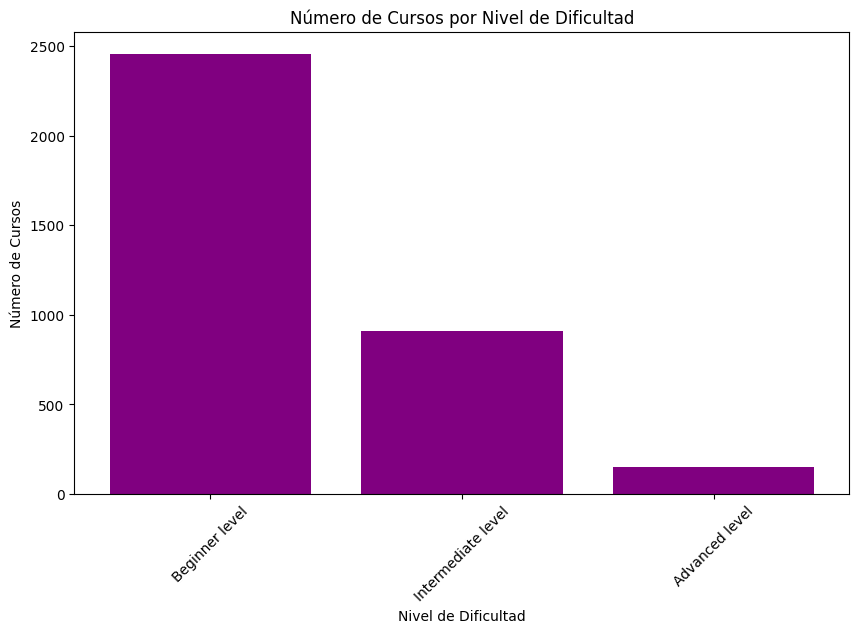

In [185]:
# Gráfica de barras que muestra el número de cursos en cada nivel de dificultad
level_counts = csv_data['Level'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(level_counts.index, level_counts.values, color='purple')
plt.title('Número de Cursos por Nivel de Dificultad')
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Número de Cursos')
plt.xticks(rotation=45)


output_dir = './Resultados/'
plt.savefig(os.path.join(output_dir, 'numero_cursos_nivel_dificultad.png'))
plt.show()
plt.close() 

C:\Users\angge\AppData\Local\Temp\ipykernel_12188\831052614.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


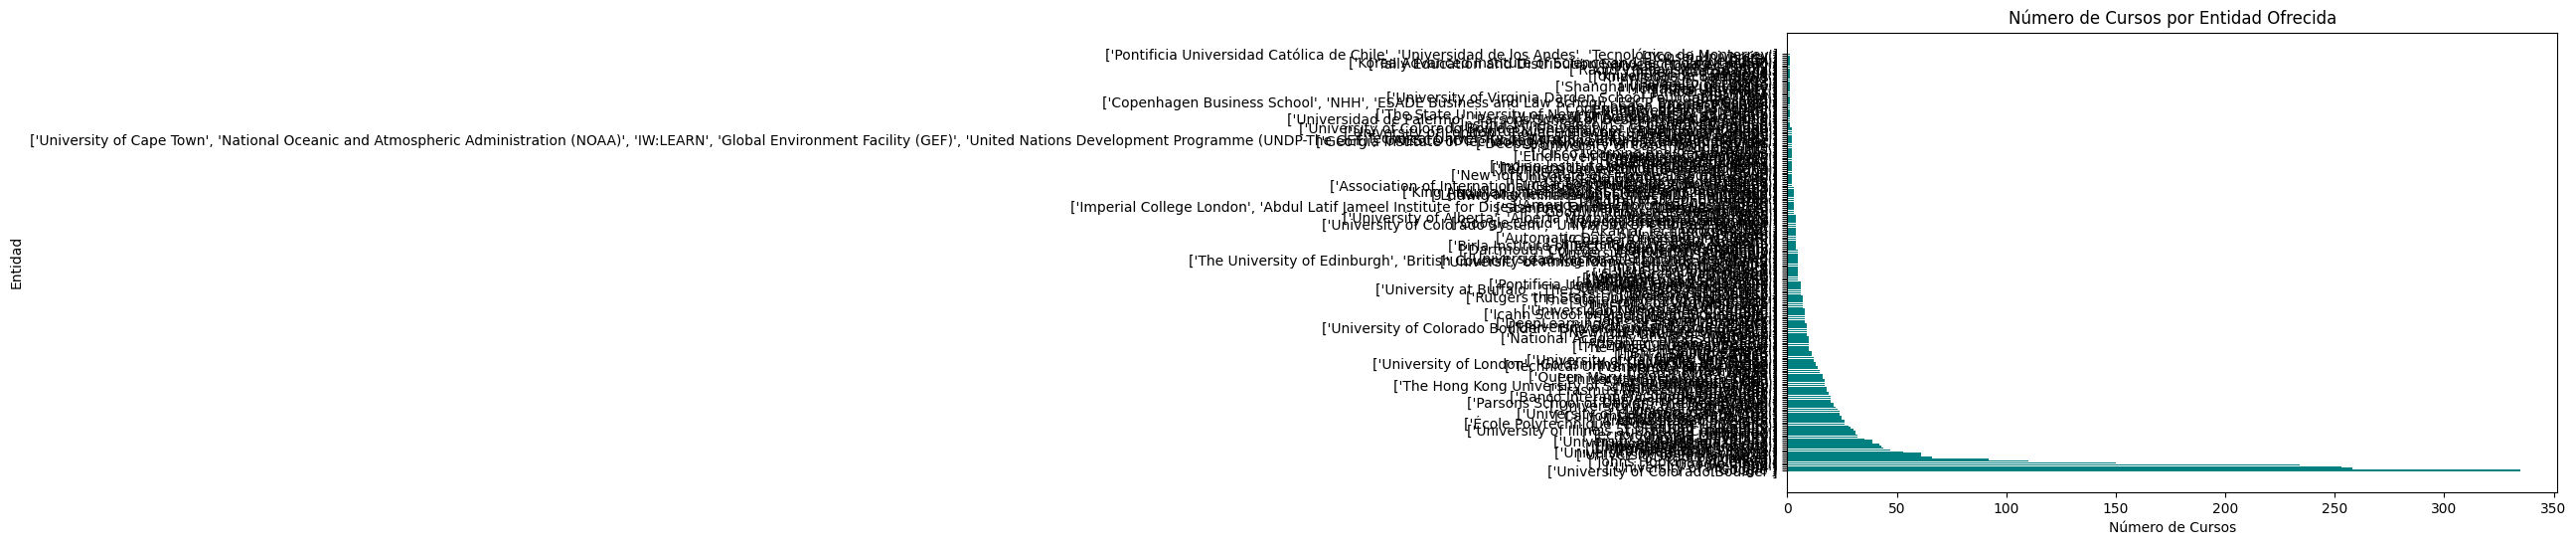

In [186]:
# Gráfica de barras horizontal que muestra el número de cursos en las principales categorías
category_counts = csv_data['Offered By'].value_counts()

# Crear la gráfica de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(category_counts.index, category_counts.values, color='teal')
plt.title('Número de Cursos por Entidad Ofrecida')
plt.xlabel('Número de Cursos')
plt.ylabel('Entidad')
plt.tight_layout()


plt.savefig(os.path.join(output_dir, 'numero_cursos_entidad_ofrecida.png')) 
plt.show()
plt.close()

In [187]:
# Tokenización
tokens = word_tokenize(text_data)

# Eliminación de palabras vacías
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

# Frecuencia de palabras
word_freq = pd.Series(filtered_tokens).value_counts()
print("Frecuencia de palabras:")
print(word_freq)

Frecuencia de palabras:
semana           1641
curso            1326
ta                843
participantes     838
dudas             814
                 ... 
comprometían        1
seleccionada        1
aplica              1
diseña              1
practico            1
Name: count, Length: 11932, dtype: int64


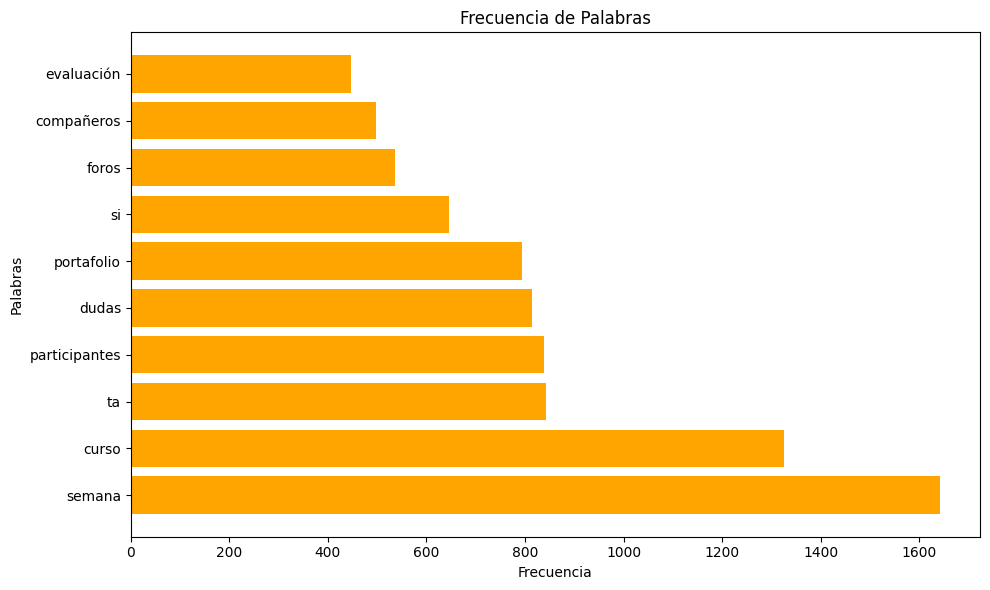

In [188]:
# Generar la gráfica de frecuencia de palabras
top_words = word_freq.head(10)

# Generar la gráfica de barras para la frecuencia de palabras
plt.figure(figsize=(10, 6))
plt.barh(top_words.index, top_words.values, color='orange')
plt.title('Frecuencia de Palabras')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.tight_layout()

plt.savefig(os.path.join(output_dir, 'frecuencia_de_palabras.png')) 
plt.show()
plt.close()

In [189]:
# Lematización
lemmatizer = WordNetLemmatizer()
words = word_tokenize(text_data)
lemmas = [lemmatizer.lemmatize(word) for word in filtered_tokens] 

# Frecuencia de lemas
lemma_freq = pd.Series(lemmas).value_counts()
print("Frecuencia de lemas:")
print(lemma_freq)

Frecuencia de lemas:
semana           1641
curso            1326
ta                976
participantes     838
dudas             814
                 ... 
cayendo             1
rigidéz             1
imprevistos         1
resúmen             1
deducida            1
Name: count, Length: 11826, dtype: int64


In [190]:
positive_words = ['bueno', 'excelente', 'fantástico', 'maravilloso', 'agradable', 'positivo']
negative_words = ['malo', 'horrible', 'terrible', 'desagradable', 'negativo']

# Tokenizar el texto
tokens = word_tokenize(text_data.lower())  # Convertir a minúsculas

# Contar las palabras positivas y negativas
positive_count = sum(1 for word in tokens if word in positive_words)
negative_count = sum(1 for word in tokens if word in negative_words)

# Calcular polaridad y subjetividad
polarity = (positive_count - negative_count) / (positive_count + negative_count + 1)  
subjectivity = (positive_count + negative_count) / len(tokens) if len(tokens) > 0 else 0

print(f"Análisis de sentimientos:\nPolaridad: {polarity*100}%\nSubjetividad: {subjectivity*100}%")


Análisis de sentimientos:
Polaridad: 92.60700389105058%
Subjetividad: 0.13910926598126372%


Palabra: semana, Frecuencia: 1641
Palabra: curso, Frecuencia: 1326
Palabra: ta, Frecuencia: 843
Palabra: participantes, Frecuencia: 838
Palabra: dudas, Frecuencia: 814
Palabra: portafolio, Frecuencia: 793
Palabra: si, Frecuencia: 646
Palabra: 1, Frecuencia: 597
Palabra: foros, Frecuencia: 536
Palabra: compañeros, Frecuencia: 497


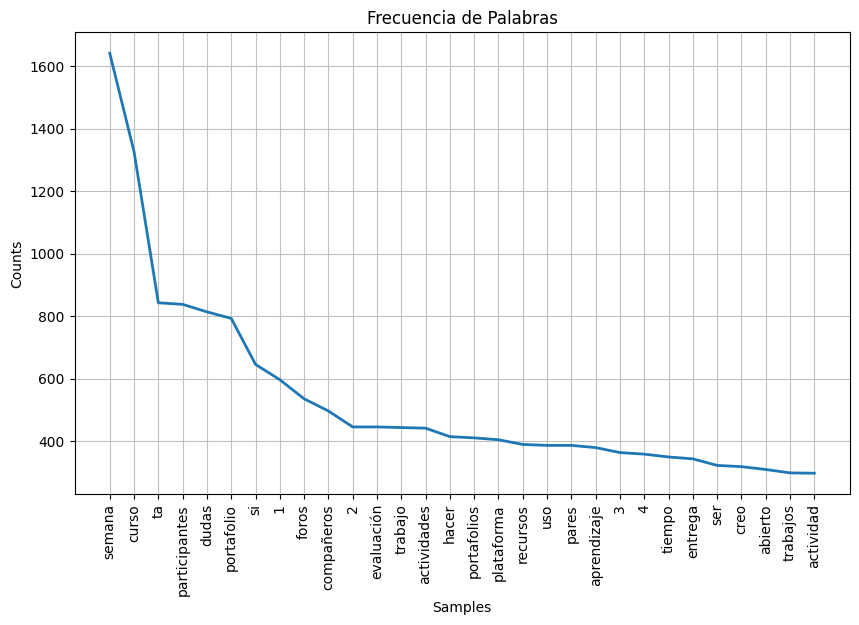

In [191]:
# Tokenizar el texto
tokens = word_tokenize(text_data)

# Filtrar palabras vacías
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Calcular la frecuencia de palabras
freq_dist = FreqDist(filtered_tokens)

# Mostrar las palabras más comunes
for word, frequency in freq_dist.most_common(10):
    print(f"Palabra: {word}, Frecuencia: {frequency}")

# Graficar la frecuencia de palabras
plt.figure(figsize=(10, 6))
freq_dist.plot(30, cumulative=False)
plt.title('Frecuencia de Palabras')

plt.savefig(os.path.join(output_dir, 'frecuencia_de_palabras.png')) 
plt.show()
plt.close()

In [192]:
# 20. Crear un DataFrame para las entidades
entities_df = pd.DataFrame(entities, columns=['Entidad', 'Etiqueta'])
#print(entities_df)

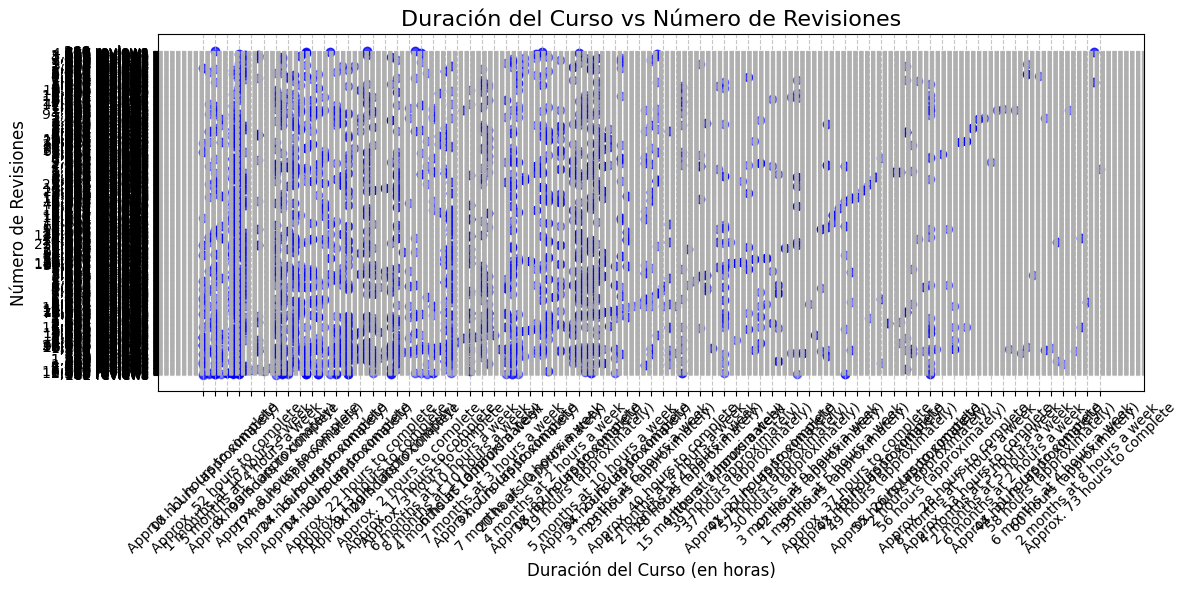

In [193]:
# Gráfico de dispersión: relación entre la duración del curso y el número de revisiones
plt.figure(figsize=(12, 6))
plt.scatter(csv_data['Duration'], csv_data['Review'], alpha=0.5, c='b')
plt.title('Duración del Curso vs Número de Revisiones', fontsize=16)
plt.xlabel('Duración del Curso (en horas)', fontsize=12)
plt.ylabel('Número de Revisiones', fontsize=12)

# Mostrar solo algunas etiquetas del eje X para reducir el desorden
plt.xticks(ticks=plt.xticks()[0][::2], rotation=45)  # Mostrar cada 2 etiquetas del eje X
plt.yticks(fontsize=10)  # Ajustar el tamaño de las etiquetas del eje Y

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar el espaciado para que no se superponga el texto

plt.savefig(os.path.join(output_dir, ' duración_del_curso_número_de_revisiones.png')) 
plt.show()
plt.close()

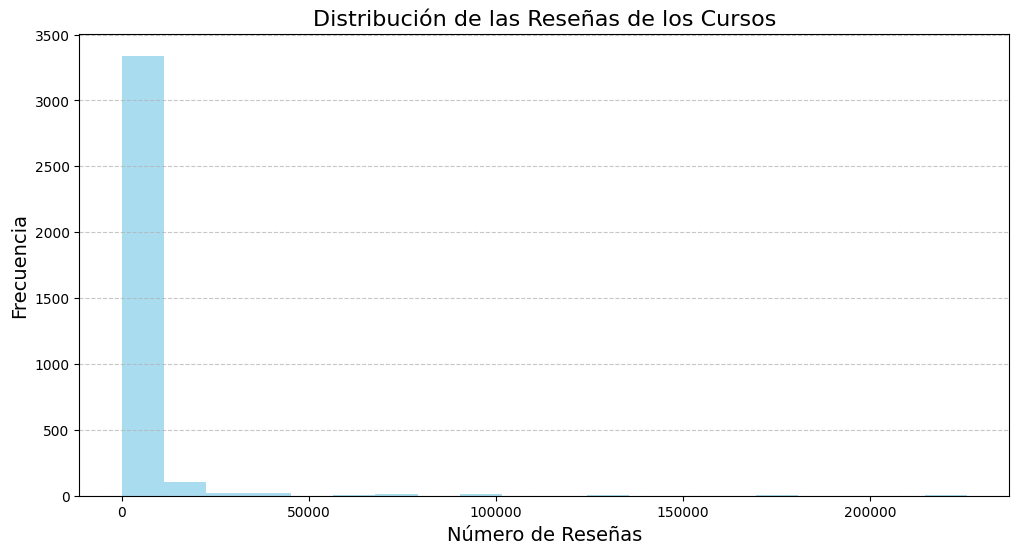

In [194]:
# Reemplazar los NaN con 'No disponible'
csv_data['Duration'] = csv_data['Duration'].fillna('No disponible')

# Verifica que los NaN hayan sido reemplazados
#print(csv_data['Duration'].unique())
# Asegúrate de que la columna Review sea numérica
csv_data['Review'] = csv_data['Review'].str.replace(' reviews', '').str.replace(',', '').astype(int)

# Ahora puedes crear un histograma de la columna 'Review'
plt.figure(figsize=(12, 6))
csv_data['Review'].plot(kind='hist', bins=20, color='skyblue', alpha=0.7)

# Configuración del gráfico
plt.title('Distribución de las Reseñas de los Cursos', fontsize=16)
plt.xlabel('Número de Reseñas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig(os.path.join(output_dir, ' Distribucion de reseña.png')) 
plt.show()
plt.close()

C:\Users\angge\AppData\Local\Temp\ipykernel_12188\1091767212.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([csv_data[csv_data['Level'] == nivel]['Rating'].dropna() for nivel in csv_data['Level'].unique()],


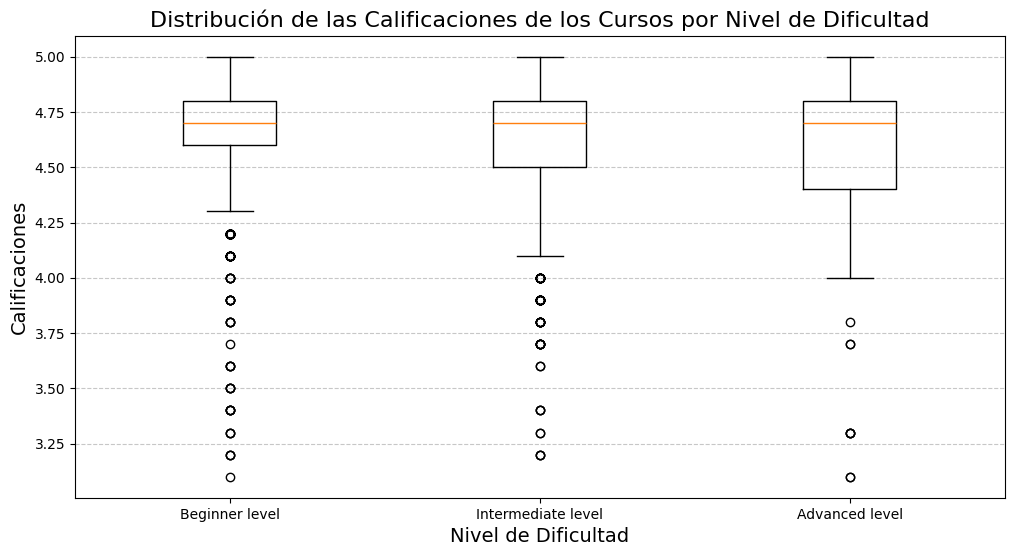

In [195]:
csv_data['Rating'] = pd.to_numeric(csv_data['Rating'], errors='coerce')

# Crear un gráfico de cajas
plt.figure(figsize=(12, 6))
plt.boxplot([csv_data[csv_data['Level'] == nivel]['Rating'].dropna() for nivel in csv_data['Level'].unique()],
            labels=csv_data['Level'].unique())

# Configuración del gráfico
plt.title('Distribución de las Calificaciones de los Cursos por Nivel de Dificultad', fontsize=16)
plt.xlabel('Nivel de Dificultad', fontsize=14)
plt.ylabel('Calificaciones', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig(os.path.join(output_dir, ' distribucion_calificaciones_curso_dificultad.png')) 
plt.show()
plt.close()

In [196]:
# Crear o abrir el archivo para escribir los resultados
output_dir = './Resultados/'
# 1. Nombres de columnas después de limpieza
with open(os.path.join(output_dir, 'nombres_columnas.txt'), 'w', encoding='utf-8') as output_file:
    output_file.write("Nombres de columnas después de limpieza:\n")
    output_file.write(f"{csv_data.columns.tolist()}\n")

# 2. Promedio de calificaciones por curso
average_ratings = csv_data.groupby('Course Title')['Rating'].mean().reset_index()
with open(os.path.join(output_dir, 'promedio_calificaciones.txt'), 'w', encoding='utf-8') as output_file:
    output_file.write("Promedio de calificaciones por curso:\n")
    for _, row in average_ratings.iterrows():
        output_file.write(f"Curso: {row['Course Title']}, Promedio: {row['Rating']:.2f}\n")

# 3. Curso con mayor y menor calificación
highest_rated_course = csv_data.loc[csv_data['Rating'].idxmax()]
lowest_rated_course = csv_data.loc[csv_data['Rating'].idxmin()]
with open(os.path.join(output_dir, 'cursos_calificacion_extremos.txt'), 'w', encoding='utf-8') as output_file:
    output_file.write(f"Curso con mayor calificación:\n{highest_rated_course['Course Title']} con rating: {highest_rated_course['Rating']}\n")
    output_file.write(f"Curso con menor calificación:\n{lowest_rated_course['Course Title']} con rating: {lowest_rated_course['Rating']}\n")

# 4. Porcentaje de cursos con horario flexible
flexible_courses = csv_data[csv_data['Schedule'] == 'Flexible schedule']
flexible_percentage = (len(flexible_courses) / len(csv_data)) * 100
with open(os.path.join(output_dir, 'porcentaje_horario_flexible.txt'), 'w', encoding='utf-8') as output_file:
    output_file.write(f"Porcentaje de cursos con horario flexible: {flexible_percentage:.2f}%\n")

# 5. Frecuencia de palabras (Ejemplo simple)
text_data = "Este es un texto de ejemplo para calcular la frecuencia de palabras."
cleaned_text = ''.join(char for char in text_data if char.isalnum() or char.isspace())
tokens = word_tokenize(cleaned_text)
filtered_tokens = [word for word in tokens if word not in stopwords.words('spanish')]
word_freq = FreqDist(filtered_tokens)
with open(os.path.join(output_dir, 'frecuencia_palabras.txt'), 'w', encoding='utf-8') as output_file:
    output_file.write("Frecuencia de palabras:\n")
    for word, freq in word_freq.items():
        output_file.write(f"{word}: {freq}\n")

# 6. Análisis de sentimientos (Ejemplo básico)
positive_words = ['bueno', 'excelente', 'fantástico', 'maravilloso']
negative_words = ['malo', 'horrible', 'terrible', 'desagradable']
positive_count = sum(1 for word in tokens if word in positive_words)
negative_count = sum(1 for word in tokens if word in negative_words)
polaridad = (positive_count - negative_count) / (positive_count + negative_count + 1)  
subjetividad = (positive_count + negative_count) / len(tokens) if len(tokens) > 0 else 0
with open(os.path.join(output_dir, 'analisis_sentimientos.txt'), 'w', encoding='utf-8') as output_file:
    output_file.write("Análisis de sentimientos:\n")
    output_file.write(f"Polaridad: {polaridad * 100:.2f}%\n")
    output_file.write(f"Subjetividad: {subjetividad * 100:.2f}%\n")

# 7. Entidades reconocidas (Ejemplo básico)
entities = [('Ejemplo', 'NOUN'), ('Curso A', 'COURSE')]
with open(os.path.join(output_dir, 'entidades_reconocidas.txt'), 'w', encoding='utf-8') as output_file:
    output_file.write("Entidades reconocidas:\n")
    for entity, label in entities:
        output_file.write(f"{entity}: {label}\n")

#print("Los resultados del análisis han sido escritos en archivos .txt")


Los resultados del análisis han sido escritos en archivos .txt
